# Shivangi Tripathi - Assignment - 3

# An E-Commerce company wants to find the factors influence the sales of the mobile Phone.

# Question - Use your EDA techniques and statistical hypothesis techniques and find the factors which influences the sales of the mobile phones.

In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as st
import matplotlib.pyplot as plt
import statsmodels.stats as stm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [99]:
db=pd.read_csv("C:\Deloitte_Docs\Data_Science\Jigsaw Academy\Statistics_Assignments\ECommerce _company_mobile sales.csv")
db.head(5)

brand           model base_color processor screen_size  ROM  RAM  \
0  Apple       iPhone SE      Black     Water  Very Small   64    2   
1  Apple  iPhone 12 Mini        Red   Ceramic       Small   64    4   
2  Apple       iPhone SE        Red     Water  Very Small   64    2   
3  Apple       iPhone XR     Others       iOS      Medium   64    3   
4  Apple       iPhone 12        Red   Ceramic      Medium  128    4   

   display_size  num_rear_camera  num_front_camera  battery_capacity  ratings  \
0           4.7                1                 1              1800      4.5   
1           5.4                2                 1              2815      4.5   
2           4.7                1                 1              1800      4.5   
3           6.1                1                 1              2942      4.6   
4           6.1                2                 1              2815      4.6   

   num_of_ratings  sales_price  discount_percent   sales  
0           38645        32999              0.17  127.52  
1             244        57149              0.04    1.39  
2           38645        32999              0.17  127.52  
3            5366        42999              0.10   23.07  
4             745        69149              0.02    5.15

In [100]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand             430 non-null    object 
 1   model             430 non-null    object 
 2   base_color        430 non-null    object 
 3   processor         430 non-null    object 
 4   screen_size       430 non-null    object 
 5   ROM               430 non-null    int64  
 6   RAM               430 non-null    int64  
 7   display_size      430 non-null    float64
 8   num_rear_camera   430 non-null    int64  
 9   num_front_camera  430 non-null    int64  
 10  battery_capacity  430 non-null    int64  
 11  ratings           430 non-null    float64
 12  num_of_ratings    430 non-null    int64  
 13  sales_price       430 non-null    int64  
 14  discount_percent  430 non-null    float64
 15  sales             430 non-null    float64
dtypes: float64(4), int64(7), object(5)
memory us

In [101]:
db['sales']=db['sales'].astype('int')

In [102]:
db.columns

Index(['brand', 'model', 'base_color', 'processor', 'screen_size', 'ROM',
       'RAM', 'display_size', 'num_rear_camera', 'num_front_camera',
       'battery_capacity', 'ratings', 'num_of_ratings', 'sales_price',
       'discount_percent', 'sales'],
      dtype='object')

In [103]:
db = pd.set_option("display.max_columns",3)
display(db)
#db.head()

None

In [104]:
pd.reset_option("display.max_columns")
display(db)

None

In [105]:
db=pd.read_csv("C:\Deloitte_Docs\Data_Science\Jigsaw Academy\Statistics_Assignments\ECommerce _company_mobile sales.csv")
db.head(5)

brand           model base_color processor screen_size  ROM  RAM  \
0  Apple       iPhone SE      Black     Water  Very Small   64    2   
1  Apple  iPhone 12 Mini        Red   Ceramic       Small   64    4   
2  Apple       iPhone SE        Red     Water  Very Small   64    2   
3  Apple       iPhone XR     Others       iOS      Medium   64    3   
4  Apple       iPhone 12        Red   Ceramic      Medium  128    4   

   display_size  num_rear_camera  num_front_camera  battery_capacity  ratings  \
0           4.7                1                 1              1800      4.5   
1           5.4                2                 1              2815      4.5   
2           4.7                1                 1              1800      4.5   
3           6.1                1                 1              2942      4.6   
4           6.1                2                 1              2815      4.6   

   num_of_ratings  sales_price  discount_percent   sales  
0           38645        32999              0.17  127.52  
1             244        57149              0.04    1.39  
2           38645        32999              0.17  127.52  
3            5366        42999              0.10   23.07  
4             745        69149              0.02    5.15

In [106]:
db.groupby('brand')['sales'].describe()

count       mean         std   min   25%     50%      75%     max
brand                                                                     
Apple     56.0  19.486964   30.991111  1.39  1.76   5.900  23.7425  127.52
Poco      56.0  43.523571   65.161764  1.50  6.93  33.835  50.0400  427.22
Realme   138.0  31.173261   41.605229  0.05  5.33  15.680  30.8100  167.73
Samsung  119.0  10.604202   22.015016  0.00  0.19   1.460   9.6550   98.89
Xiaomi    61.0  60.673770  112.816946  0.13  1.95   6.940  82.0900  550.19

# From the above table we can infer that-
* the maximum count of the brand is Apple (138.0), 
* the maximum variance is caused by the 'Xiaomi' brand and 
* the minimum variance is caused by 'Samsung' brand. 
* The highest median is of the 'Poco' brand and 
* the minimum value is of the 'Samsung' brand and 
* maximum is of the 'Xiaomi' brand.

<AxesSubplot:xlabel='sales', ylabel='Count'>

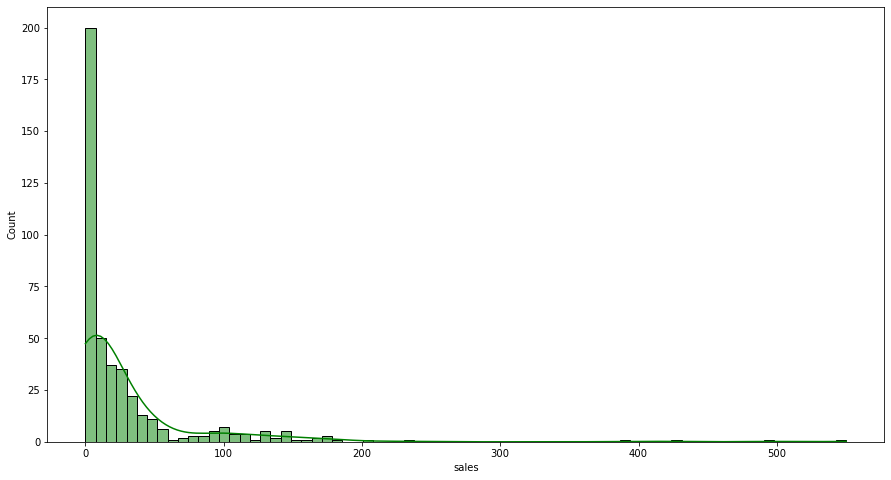

In [107]:
plt.figure(figsize=(15,8))
sns.histplot(x='sales', data=db,kde=True , color = 'Green')

# From the above graph we can conclude that-
the graph is right skewed as the tail is on the right side which also means that the mean is greater than the median and The sales data is right skewed The price range of mobile phones selling the most is between and the highest count is around 200.

In [108]:
db.model.value_counts()

iPhone XR            18
iPhone 12            17
iPhone 12 Mini       16
GT Master Edition     9
X3                    9
                     ..
Galaxy A7             1
Galaxy Fold 2         1
Galaxy M11            1
6i                    1
Redmi 5               1
Name: model, Length: 119, dtype: int64

In [109]:
db.sales.value_counts()

23.07    9
25.76    9
5.15     6
5.90     6
1.76     6
        ..
0.15     1
1.74     1
0.11     1
0.28     1
1.53     1
Name: sales, Length: 216, dtype: int64

In [110]:
db.display_size.value_counts()

6.5    164
6.4     64
6.7     62
6.1     43
6.3     22
5.4     16
6.6     14
6.2     12
5.8      6
5.5      6
6.0      5
7.6      4
4.7      4
5.7      3
6.9      2
5.2      2
5.6      1
Name: display_size, dtype: int64

<AxesSubplot:xlabel='processor', ylabel='count'>

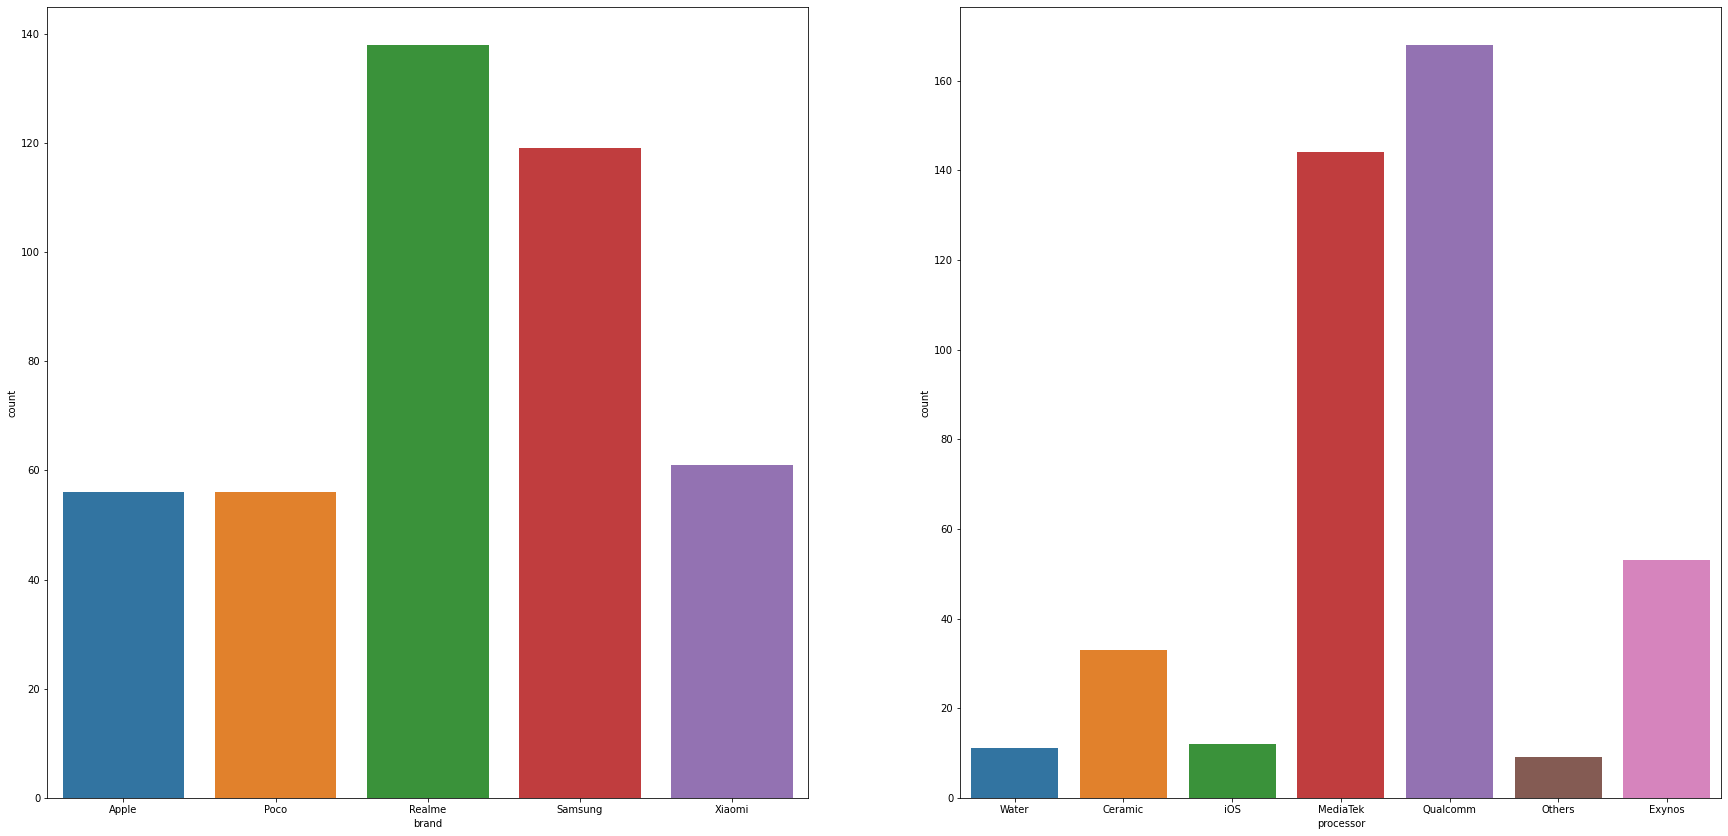

In [111]:
plt.figure(figsize=(30,32))
plt.subplot(2,2,1)
sns.countplot(x='brand',data=db)
plt.subplot(2,2,2)
sns.countplot(x='processor',data=db)


<AxesSubplot:xlabel='display_size', ylabel='Count'>

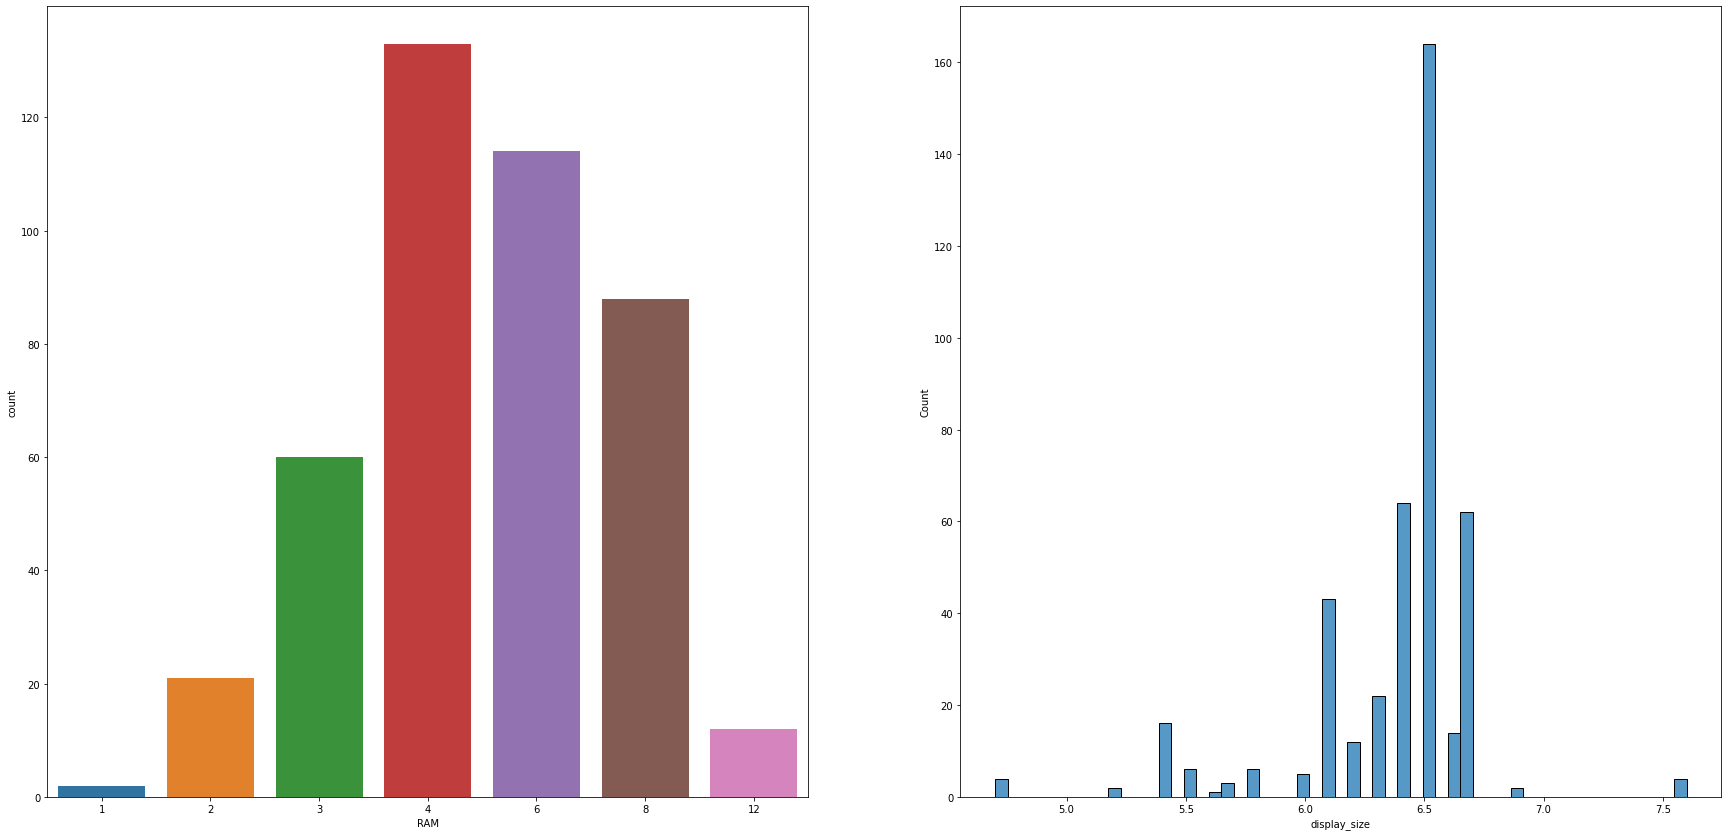

In [112]:
plt.figure(figsize=(30,32))
plt.subplot(2,2,3)
sns.countplot(x='RAM',data=db)
plt.subplot(2,2,4)
sns.histplot(db.display_size)

<AxesSubplot:xlabel='ROM', ylabel='count'>

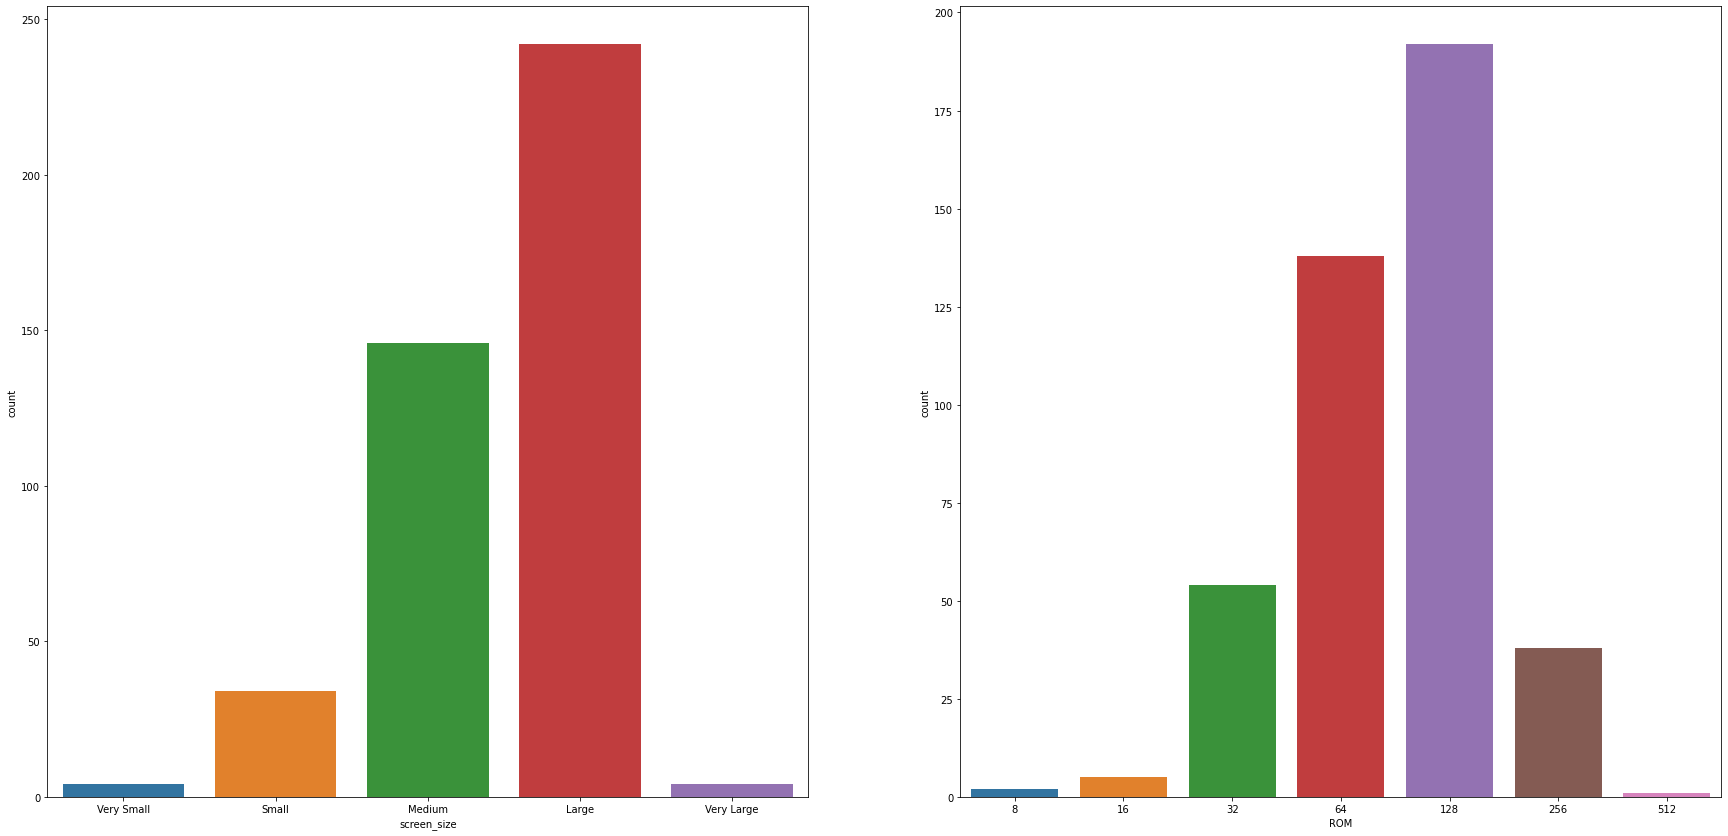

In [113]:
plt.figure(figsize=(30,32))
plt.subplot(2,2,3)
sns.countplot(x='screen_size',data=db)
plt.subplot(2,2,4)
sns.countplot(x='ROM',data=db)

<AxesSubplot:xlabel='battery_capacity', ylabel='Count'>

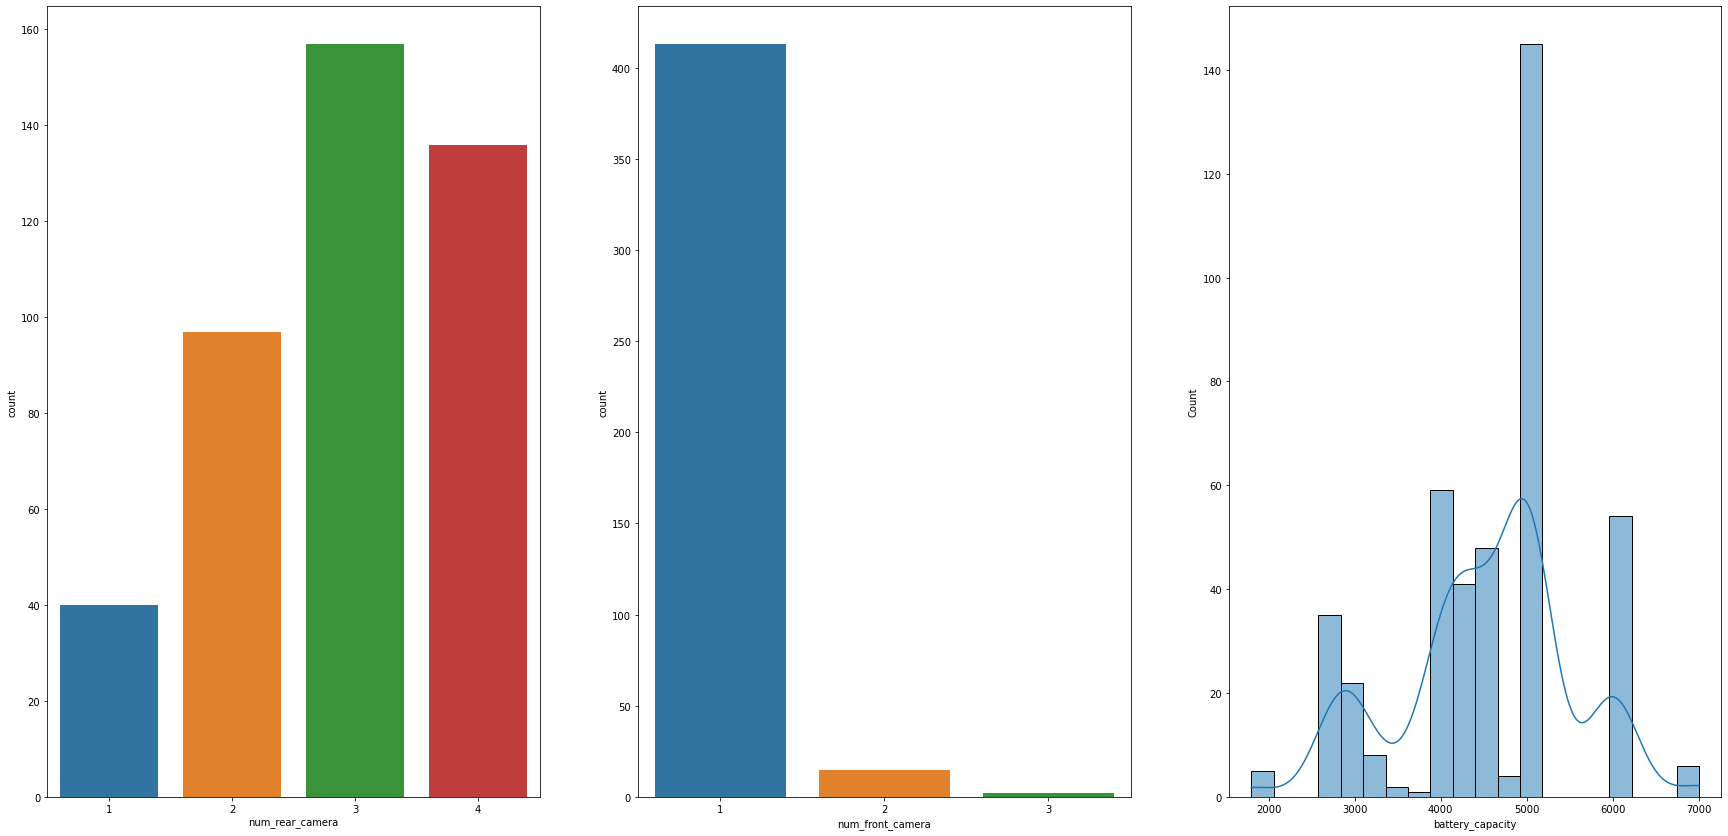

In [114]:
plt.figure(figsize=(30,32))
plt.subplot(2,3,1)
sns.countplot(x='num_rear_camera',data=db)
plt.subplot(2,3,2)
sns.countplot(x='num_front_camera',data=db)
plt.subplot(2,3,3)
sns.histplot(x='battery_capacity',data=db,kde=True)

processor
Ceramic     AxesSubplot(0.125,0.125;0.775x0.755)
Exynos      AxesSubplot(0.125,0.125;0.775x0.755)
MediaTek    AxesSubplot(0.125,0.125;0.775x0.755)
Others      AxesSubplot(0.125,0.125;0.775x0.755)
Qualcomm    AxesSubplot(0.125,0.125;0.775x0.755)
Water       AxesSubplot(0.125,0.125;0.775x0.755)
iOS         AxesSubplot(0.125,0.125;0.775x0.755)
Name: sales, dtype: object

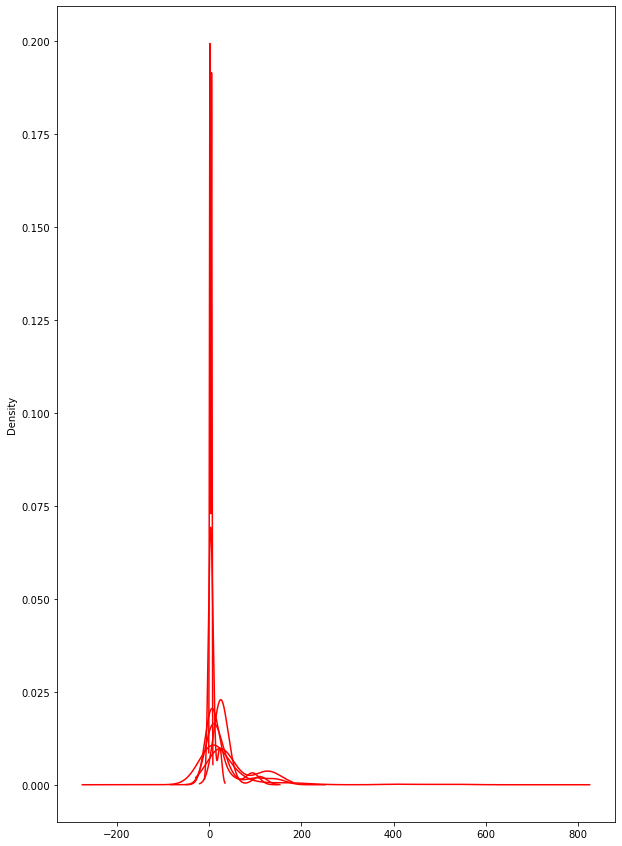

In [115]:
plt.figure(figsize=(10,15))
db.groupby('processor')['sales'].plot(kind='kde', color = 'red')

# From the above graphs we can conclude that - 

* Realme brand is the most selling brand amongst all the brands.

* Purchase of the 'Qualcom' processors is most amongst all.

* Customers prefer mobiles with large screen 

* Mobiles with ROM of 128GB is purchased more

* Mobiles with 4GB RAM is purchased more

* Most of the mobiles has the Display_size of 6.5 inch


In [116]:
# Question - Affect of the sales of mobile phones due to brands ? 
# Verify the claim at 5% level of significance that the brands affect the sales of the mobile phones.

apple=db[db.brand=='Apple']['sales']
poco=db[db.brand=='Poco']['sales']
realme=db[db.brand=='Realme']['sales']
samsung=db[db.brand=='Samsung']['sales']
xiaomi=db[db.brand=='Xiaomi']['sales']

In [117]:
# Test for normality
st.shapiro(apple)

ShapiroResult(statistic=0.5601317286491394, pvalue=1.067538071830576e-11)

since p value (1.06) is less than alpha(0.05) so we can conclude that the brand is not following the normal distribution and so we reject the null hypothesis here.

We will now proceed with 'Kruskar Wallis' test

In [118]:
# Variance test
st.levene(apple,poco,realme,samsung,xiaomi)

# since p value is less than alpha(0.05)-
# hence we conclude that variance of the brands differ

LeveneResult(statistic=8.749610107837015, pvalue=8.543508526010748e-07)

# Stating the H0 and H1 - 

* H0:population median sales of all brands are same
    
* H1:population median sales of any two brands is different 

In [119]:
st.kruskal(apple,poco,realme,samsung,xiaomi)

KruskalResult(statistic=81.1272605974471, pvalue=1.0049690071559526e-16)

# Conclusion - 

Since p value<alpha(0.05) --> So we reject the null hypothesis (H0). Therefore, the population median sales of any two brands is different

In [120]:
pairwise_tukeyhsd(db.sales,db.brand).summary()

<class 'statsmodels.iolib.table.SimpleTable'>

In [121]:
db.groupby('base_color')['sales'].describe()

count       mean         std   min     25%     50%       75%  \
base_color                                                                 
Black       112.0  33.097143   71.409111  0.00  1.5000   7.370   25.7600   
Blue        117.0  26.430256   39.065509  0.00  2.9400  11.000   30.8500   
Bronze        5.0   6.186000    8.543596  0.15  0.2000   1.010   10.0400   
Gold         11.0  99.592727  162.735009  0.81  2.9750  31.990  135.1200   
Gray         20.0  20.839000   39.732968  0.05  0.3050   5.530   17.9675   
Green        24.0  30.128750   43.174159  0.10  1.5500  14.805   34.3175   
Others       28.0  22.959643   21.604886  0.06  3.7575  20.340   33.7250   
Purple        5.0   3.300000    2.061516  1.52  1.7600   2.170    5.1500   
Red          21.0  48.557619   97.510575  0.26  1.5200   5.650   42.5800   
Silver       32.0  26.111250   40.607229  0.19  4.1700  10.960   23.5725   
White        44.0  22.659545   33.603876  0.00  0.7025   5.195   26.5500   
Yellow       11.0  19.663636   17.532007  0.34  4.9600  18.380   25.7600   

               max  
base_color          
Black       493.98  
Blue        204.00  
Bronze       19.53  
Gold        550.19  
Gray        167.73  
Green       167.73  
Others       79.88  
Purple        5.90  
Red         427.22  
Silver      142.70  
White       127.52  
Yellow       51.84

In [122]:
black=db[db.base_color=='Black']['sales']
blue=db[db.base_color=='Blue']['sales']
bronze=db[db.base_color=='Bronze']['sales']
gold=db[db.base_color=='Gold']['sales']
grey=db[db.base_color=='Grey']['sales']
green=db[db.base_color=='Green']['sales']
others=db[db.base_color=='Others']['sales']
purple=db[db.base_color=='Purple']['sales']
red=db[db.base_color=='Red']['sales']
silver=db[db.base_color=='Silver']['sales']
white=db[db.base_color=='White']['sales']
yellow=db[db.base_color=='Yellow']['sales']

In [123]:
#test of normality
st.shapiro(yellow)

ShapiroResult(statistic=0.8802222013473511, pvalue=0.10472401976585388)

Hence we conclude that the 'Yellow' color doesn't follow normal distribution, so we will now proceed with non-parametric test - 'Kruskal Wallis' test

* Assumptions - 
H0:the population median base color for all mobile sales is same
    
H1:the population median base color for atleast two mobile sales is different

In [124]:
# Anova test - 

model=ols('sales~base_color',data=db).fit()
anova_db=anova_lm(model)
anova_db

df        sum_sq      mean_sq         F    PR(>F)
base_color   11.0  7.654232e+04  6958.392586  2.097704  0.019475
Residual    418.0  1.386567e+06  3317.146580       NaN       NaN

Here, since p value<alpha(0.05) --> We reject the null hypothesis therefore we can conclude that the population median base color for atleast two mobile sales is different

In [125]:
pairwise_tukeyhsd(db.sales,db.base_color).summary()

<class 'statsmodels.iolib.table.SimpleTable'>

In [126]:
# Affect of the sales of mobile phones due to the processors? To verify the claim at 5% level of significance¶

db.processor.value_counts()

Qualcomm    168
MediaTek    144
Exynos       53
Ceramic      33
iOS          12
Water        11
Others        9
Name: processor, dtype: int64

In [127]:
db.head(7)

brand           model base_color processor screen_size  ROM  RAM  \
0  Apple       iPhone SE      Black     Water  Very Small   64    2   
1  Apple  iPhone 12 Mini        Red   Ceramic       Small   64    4   
2  Apple       iPhone SE        Red     Water  Very Small   64    2   
3  Apple       iPhone XR     Others       iOS      Medium   64    3   
4  Apple       iPhone 12        Red   Ceramic      Medium  128    4   
5  Apple       iPhone 12       Blue   Ceramic      Medium   64    4   
6  Apple       iPhone 12      White   Ceramic      Medium  128    4   

   display_size  num_rear_camera  num_front_camera  battery_capacity  ratings  \
0           4.7                1                 1              1800      4.5   
1           5.4                2                 1              2815      4.5   
2           4.7                1                 1              1800      4.5   
3           6.1                1                 1              2942      4.6   
4           6.1                2                 1              2815      4.6   
5           6.1                2                 1              2815      4.6   
6           6.1                2                 1              2815      4.6   

   num_of_ratings  sales_price  discount_percent   sales  
0           38645        32999              0.17  127.52  
1             244        57149              0.04    1.39  
2           38645        32999              0.17  127.52  
3            5366        42999              0.10   23.07  
4             745        69149              0.02    5.15  
5             745        64149              0.02    4.78  
6             745        69149              0.02    5.15

In [128]:
qualcomm=db[db.processor=='Qualcomm']['sales']
mediatek=db[db.processor=='MediaTek']['sales']
water=db[db.processor=='Water']['sales']
others=db[db.processor=='Others']['sales']
exynos=db[db.processor=='Exynos']['sales']
ceramic=db[db.processor=='Ceramic']['sales']
ios=db[db.processor=='iOS']['sales']

In [129]:
#test of normality
st.shapiro(mediatek)

ShapiroResult(statistic=0.7071598768234253, pvalue=1.3591576433728413e-15)

So we can conclude that the 'Mediatek' processor doesn't follow the normal distribution hence , we can proceed with non parametric test - 'Kruskal Wallis' test

* Assumptions - 
H0:population median of processor in all mobiles are same
    
H1:population median of processor in any two mobiles are different

In [130]:
st.kruskal(qualcomm,mediatek,water,others,exynos,ceramic,ios)

KruskalResult(statistic=38.802689691877966, pvalue=7.824070887688046e-07)

In [131]:
model_new=ols('sales~processor',data=db).fit()
anova_new=anova_lm(model_new)
anova_new

df        sum_sq      mean_sq         F    PR(>F)
processor    6.0  4.421841e+04  7369.735753  2.197066  0.042369
Residual   423.0  1.418891e+06  3354.352658       NaN       NaN

since p value<alpha(0.05) --> reject H0

hence we conclude that population median of processor in any two mobiles are different

In [132]:
pairwise_tukeyhsd(db.sales,db.processor).summary()

<class 'statsmodels.iolib.table.SimpleTable'>

In [133]:
# Influence on the sales of mobile phones due to the screen-size? To verify the claim at 5% level of significance - 

db.screen_size.value_counts()

Large         242
Medium        146
Small          34
Very Small      4
Very Large      4
Name: screen_size, dtype: int64

In [134]:
large=db[db.screen_size=='Large']['sales']
medium=db[db.screen_size=='Medium']['sales']
very_small=db[db.screen_size=='Very Small']['sales']
v_large=db[db.screen_size=='Very Large']['sales']
small=db[db.screen_size=='Small']['sales']

In [135]:
st.shapiro(v_large)

ShapiroResult(statistic=0.7634789943695068, pvalue=0.05122942104935646)

Here since the p-value (0.05) is less than alpha so it doesn't follow the normal distribution. Thus , the screen size does't follow normal hence, we will now proceed with 'Kruskal Wallis' test

* Assumptions - 

H0:population median sales of mobiles with screen size are same
    
H1:population median sales of any two mobiles with screen size are different 

In [136]:
model_new2=ols('sales~screen_size',data=db).fit()
anova_new2=anova_lm(model_new2)
anova_new2

df        sum_sq       mean_sq         F    PR(>F)
screen_size    4.0  4.844485e+04  12111.213569  3.638506  0.006275
Residual     425.0  1.414665e+06   3328.622904       NaN       NaN

* Conclusions - 

Here since p value is less than alpha(0.05) --> reject the null hypothesis (H0) therefore, we can conclude that population median sales of any two mobiles with screen size are different.

In [137]:
pairwise_tukeyhsd(db.sales,db.screen_size).summary()

<class 'statsmodels.iolib.table.SimpleTable'>

In [138]:
# Influence on the sales of mobile phone based on the rating? To verif the claim at 5% level of significance - 

db.head(10)

brand           model base_color processor screen_size  ROM  RAM  \
0  Apple       iPhone SE      Black     Water  Very Small   64    2   
1  Apple  iPhone 12 Mini        Red   Ceramic       Small   64    4   
2  Apple       iPhone SE        Red     Water  Very Small   64    2   
3  Apple       iPhone XR     Others       iOS      Medium   64    3   
4  Apple       iPhone 12        Red   Ceramic      Medium  128    4   
5  Apple       iPhone 12       Blue   Ceramic      Medium   64    4   
6  Apple       iPhone 12      White   Ceramic      Medium  128    4   
7  Apple       iPhone 12      Green   Ceramic      Medium   64    4   
8  Apple       iPhone 12       Blue   Ceramic      Medium  128    4   
9  Apple       iPhone 12      Black   Ceramic      Medium  128    4   

   display_size  num_rear_camera  num_front_camera  battery_capacity  ratings  \
0           4.7                1                 1              1800      4.5   
1           5.4                2                 1              2815      4.5   
2           4.7                1                 1              1800      4.5   
3           6.1                1                 1              2942      4.6   
4           6.1                2                 1              2815      4.6   
5           6.1                2                 1              2815      4.6   
6           6.1                2                 1              2815      4.6   
7           6.1                2                 1              2815      4.6   
8           6.1                2                 1              2815      4.6   
9           6.1                2                 1              2815      4.6   

   num_of_ratings  sales_price  discount_percent   sales  
0           38645        32999              0.17  127.52  
1             244        57149              0.04    1.39  
2           38645        32999              0.17  127.52  
3            5366        42999              0.10   23.07  
4             745        69149              0.02    5.15  
5             745        64149              0.02    4.78  
6             745        69149              0.02    5.15  
7             745        64149              0.02    4.78  
8             745        69149              0.02    5.15  
9             745        69149              0.02    5.15

In [139]:
db.tail(10)

brand             model base_color processor screen_size  ROM  RAM  \
420  Xiaomi            Mi 10i      Black  Qualcomm       Large  128    8   
421  Xiaomi  Redmi Note 9 Pro       Blue  Qualcomm       Large  128    4   
422  Xiaomi  Redmi Note 9 Pro       Blue  Qualcomm       Large  128    6   
423  Xiaomi          Redmi Y3        Red  Qualcomm      Medium   32    3   
424  Xiaomi           Redmi 5       Blue  Qualcomm       Small   16    2   
425  Xiaomi       Redmi 6 Pro      Black  Qualcomm       Small   32    3   
426  Xiaomi       Redmi 6 Pro        Red  Qualcomm       Small   64    4   
427  Xiaomi        Mi 11 Lite     Others  Qualcomm       Large  128    6   
428  Xiaomi     Redmi 8A Dual       Blue  Qualcomm      Medium   32    3   
429  Xiaomi       Redmi 6 Pro       Blue  Qualcomm       Small   32    3   

     display_size  num_rear_camera  num_front_camera  battery_capacity  \
420           6.7                4                 1              4820   
421           6.7                2                 1              5020   
422           6.7                4                 1              5020   
423           6.3                2                 1              4000   
424           5.7                1                 1              3300   
425           5.8                2                 1              4000   
426           5.8                2                 1              4000   
427           6.5                3                 1              4250   
428           6.2                2                 1              5000   
429           5.8                2                 1              4000   

     ratings  num_of_ratings  sales_price  discount_percent  sales  
420      4.3             663        24215              0.06   1.61  
421      4.4            6106        14199              0.03   8.67  
422      4.3             434        14999              0.06   0.65  
423      4.4            6844         8252              0.31   5.65  
424      4.3            4267         6890              0.18   2.94  
425      4.3            1870         7999              0.30   1.50  
426      4.3            1783         9699              0.28   1.73  
427      4.2            1554        21999              0.12   3.42  
428      4.2            8161         8299              0.07   6.77  
429      4.3            1870         8190              0.36   1.53

In [140]:
db2 = db.groupby('num_of_ratings')['sales'].describe()
db2.head(10)

count      mean           std   min   25%    50%   75%   max
num_of_ratings                                                              
4                 3.0  0.000000  0.000000e+00  0.00  0.00  0.000  0.00  0.00
6                 2.0  0.020000  0.000000e+00  0.02  0.02  0.020  0.02  0.02
7                 6.0  0.056667  5.125102e-02  0.01  0.01  0.055  0.10  0.11
8                 4.0  0.070000  0.000000e+00  0.07  0.07  0.070  0.07  0.07
10                1.0  0.150000           NaN  0.15  0.15  0.150  0.15  0.15
16                2.0  0.060000  0.000000e+00  0.06  0.06  0.060  0.06  0.06
19                3.0  0.050000  8.498375e-18  0.05  0.05  0.050  0.05  0.05
23                3.0  0.030000  0.000000e+00  0.03  0.03  0.030  0.03  0.03
26                5.0  0.132000  7.014271e-02  0.06  0.06  0.140  0.20  0.20
35                1.0  0.130000           NaN  0.13  0.13  0.130  0.13  0.13

In [141]:
total_rating=db.num_of_ratings
totalsales=db.sales

In [142]:
st.levene(total_rating,totalsales)

LeveneResult(statistic=71.16045069744301, pvalue=1.3875091549124772e-16)

Hence since the p-value is less than alpha(0.05) hence we can conclude that the population variance of number_of_ratings and sales are different. Thus, we will now proceed with 'Mannwhitneyu' test

* Assumptions - 

H0:population total mean of number of ratings and sales is same
    
H1:population total mean of number of ratings and sales is different

In [143]:
st.mannwhitneyu(total_rating,totalsales)

MannwhitneyuResult(statistic=178245.5, pvalue=1.1054995707615679e-122)

Here as the p-value here is less than alpha(0.05) --> we will reject the null hypothesis: H0

Therefore,we can conclude that population total mean of number of ratings and sales is same

since p value<alpha(0.05) --> reject H0

hence we conclude that population median discount does not influence sales 

H0:the population median price of mobile influence sales
    
H1:the population median price of mobile doesn't influence sales

In [144]:
# Influence on sales because of the price of mobile phones? To verify the claim at 5% level - 

price=db.sales_price
sales=db.sales

In [145]:
st.levene(price,sales)

LeveneResult(statistic=194.46565955415736, pvalue=5.475134189670585e-40)

Here since p-value is less than alpha(0.05) --> so we will reject the null-hypothesis (H0). Hence, we will proceed with 'Mannwhitneyu' test - 

In [146]:
st.mannwhitneyu(price,sales)

MannwhitneyuResult(statistic=184900.0, pvalue=3.923448130005815e-142)

Heree, since the p-value is less than alpha(0.05) so we will reject the null-hypothesis (H0) hence, we can conclude that population median discount influences the sales of the mobile phones. 

# *********************End of the Assignment 3**************